# Generalized Method of Moments Estimation (MACS 30100 and 40200)
### by [Richard W. Evans](https://sites.google.com/site/rickecon/), January 2018
The code in this Jupyter notebook was written using Python 3.6. It also uses data file `Econ381totpts.txt` and the image file `MLEplots.png`. For the code to run properly, you should have the data file and the image fil in the same folder as the Jupyter notebook file. Otherwise, you will have to change the respective lines of the code that read in the data to reflect the location of that data.

## 1. MLE vs. GMM: Strengths and weaknesses
A paper by Fuhrer, et al (1995) studies the accuracy and efficiency of the maximum likelihood (ML) estimator versus the generalized method of moments (GMM) estimator in the context of a simple linear-quadratic inventory model. They find that ML has some very nice properties over GMM in small samples when the model is simple. In the spirit of the Fuhrer, et al (1995) paper, we list the strengths and weaknesses of MLE vs. GMM more generally. I recommend you read the introduction to Fuhrer, et al (1995).

### 1.1. MLE strengths
* More statistical significance. In general, MLE provides more statistical significance for parameter estimates than does GMM. This comes from the strong distributional assumptions that are necessary for the ML estimates.
* ML estimates are less sensitive to parameter or model normalizations than are GMM estimates.
* ML estimates have nice small sample properties. ML estimates have less bias and more efficiency with small data samples than GMM estimates in many cases.

### 1.2. MLE weaknesses
* MLE requires strong distributional assumptions. For MLE, the data generating process (DGP) must be completely specified. This assumes a lot of knowledge about the DGP. This assumption is likely almost always wrong.
* MLE is very difficult in rational expectations models. This is because the consistency of beliefs induces a nonlinearity in the likelihood function that makes it difficult to find the global optimum.
* MLE is very difficult in nonlinear models. The likelihood function can become highly nonlinear in MLE even if the model is linear when the data are irregular. This difficulty is multiplied when the model itself is more complicated and nonlinear.

### 1.3. GMM strengths
* GMM allows for most flexible identification. GMM estimates can be identified by any set of moments from the data as long as you have at least as many moments as you have parameters to estimate and that those moments are independent enough to identify the parameters. (And the parameters are independent enough of each other to be separately identified.)
* Good large sample properties. The GMM estimator is strongly consistent and asymptotically normal. GMM will likely be the best estimator if you have a lot of data.
* GMM requires minimal assumptions about the DGP. In GMM, you need not specify the distributions of the error terms in your model of the DGP. This is often a strength, given that most error are not observed and most models are gross approximations of the true DGP.

### 1.4. GMM weaknesses
* GMM estimates are usually less statistically significant than ML estimates. This comes from the minimal distributional assumptions. GMM parameter estimates usually are measured with more error.
* GMM estimates can be sensitive to normalizations of the model or parameters.
* GMM estimates have bad small sample properties. GMM estimates can have large bias and inefficiency in small samples.

### 1.5. Key questions to answer when deciding between MLE and GMM
1. How much data is available for the estimation? Large data samples will make GMM relatively more attractive than MLE because of the nice large sample properties of GMM and fewer required assumptions on the model
2. How complex is the model? Linear models or quadratic models are much easier to do using MLE than are more highly nonlinear models. Rational expectations models (macroeconomics) create an even more difficult level of nonlinearity that pushes you toward GMM estimation.
3. How comfortable are you making strong distributional assumptions? MLE requires a complete specification of all distributional assumptions of the model DGP. If you think these assumptions are too strong, you should use GMM.

## 2. The GMM estimator
GMM was first formalized by Hansen (1982). A strength of GMM estimation is that the econometrician can remain completely agnostic as to the distribution of the random variables in the DGP. For identification, the econometrician simply needs at least as many moment conditions from the data as he has parameters to estimate.

A *moment* of the data is broadly defined as any statistic that summarizes the data to some degree. A data moment could be as narrow as an individual observation from the data or as broad as the sample average. GMM estimates the parameters of a model or data generating process to make the model moments as close as possible to the corresponding data moments. See Davidson and MacKinnon (2004, ch. 9) for a more detailed treatment of GMM. The estimation methods of linear least squares, nonlinear least squares, generalized least squares, and instrumental variables estimation are all specific cases of the more general GMM estimation method.

Let $m(x)$ be an $R\times 1$ vector of moments from the real world data $x$. And let $x$ be an $N\times K$ matrix of data with $K$ columns representing $K$ variables and $N$ observations. Let the model DGP be characterized as $F(x,\theta)$, where $F$ is a vector of equations, each of which is a function of the data $x$ and the $K\times 1$ parameter vector $\theta$. Then define $m(x|\theta)$ as a vector of $R$ moments from the model that correspond to the real-world moment vector $m(x)$. Note that GMM requires both real world data $x$ and deterministic moments from the model $m(x|\theta)$ in order to estimate $\hat{\theta}_{GMM}$. There is also a stochastic way to generate moments from the model, which we discuss later in our section on Simulated Method of Moments (SMM).

The GMM approach of estimating the parameter vector $\hat{\theta}_{GMM}$ is to choose $\theta$ to minimize some distance measure of the data moments $m(x)$ from the model moments $m(x|\theta)$.

$$ \hat{\theta}_{GMM}=\theta:\quad \min_{\theta}\: ||m(x|\theta)-m(x)|| $$

The distance measure $||m(x|\theta)-m(x)||$ can be any kind of norm. But it is important to recognize that your estimates $\hat{\theta}_{GMM}$ will be dependent on what distance measure (norm) you choose. The most widely studied and used distance metric in GMM estimation is the $L^2$ norm or the sum of squared errors in moments. Define the moment error function $e(x|\theta)$ as the percent difference in the vector of model moments from the data moments.

$$ e(x|\theta) \equiv \frac{m(x|\theta)-m(x)}{m(x)} $$

It is important that the error function $e(x|\theta)$ be a percent deviation of the moments (given that none of the data moments are 0 or that they cannot be both positive and negative). This puts all the moments in the same units, which helps make sure that no moments receive unintended weighting simply due to its units. This ensures that the problem is scaled properly and does not suffer from ill conditioning.

In this case, the GMM estimator is the following,

$$ \hat{\theta}_{GMM}=\theta:\quad \min_{\theta}\:e(x|\theta)^T \, W \, e(x|\theta) $$

where $W$ is a $R\times R$ weighting matrix in the criterion function. For now, think of this weighting matrix as the identity matrix. But we will show in Section 3 a more optimal weighting matrix. We call the quadratic form expression $e(x|\theta)^T \, W \, e(x|\theta)$ the *criterion function* because it is a strictly positive scalar that is the object of the minimization in the GMM problem statement. The $R\times R$ weighting matrix $W$ in the criterion function allows the econometrician to control how each moment is weighted in the minimization problem. For example, an $R\times R$ identity matrix for $W$ would give each moment equal weighting, and the criterion function would be a simply sum of squared percent deviations (errors). Other weighting strategies can be dictated by the nature of the problem or model.

## 3. The Weighting Matrix (W)
In the GMM criterion function in the problem statement above, some weighting matrices $W$ produce precise estimates while others produce poor estimates with large variances. We want to choose the optimal weighting matrix $W$ with the smallest possible asymptotic variance. This is an efficient of optimal GMM estimator. The optimal weighting matrix is the inverse variance covariance matrix of the moments at the optimal moments,

$$ W^{opt} \equiv \Omega^{-1}(x|\hat{\theta}_{GMM}) $$

where $\Omega(x|\theta)$ is the variance covariance matrix of the moment condition errors $e(x|\theta)$. The intuition for using the inverse variance covariance matrix $\Omega^{-1}$ as the optimal weighting matrix is the following. You want to downweight moments that have a high variance, and you want to weight more heavily the moments that are generated more precisely.

Notice that this definition of the optimal weighting matrix is circular. $W^{opt}$ is a function of the GMM estimates $\hat{\theta}_{GMM}$, but the optimal weighting matrix is used in the estimation of $\hat{\theta}_{GMM}$. This means that one has to use some kind of iterative fixed point method to find the true optimal weighting matrix $W^{opt}$. Below are some examples of weighting matrices to use.

### 3.1. The identity matrix (W = I)
Many times, you can get away with just using the identity matrix as your weighting matrix $W = I$. This changes the criterion function to a simple sum of squared error functions such that each moment has the same weight.

$$ \hat{\theta}_{GMM}=\theta:\quad \min_{\theta}\:e(x|\theta)^T \, e(x|\theta) $$

If the problem is well conditioned and well identified, then your GMM estimates $\hat{\theta}_{GMM}$ will not be greatly affected by this simplest of weighting matrices.

### 3.2. Two-step variance covariance estimator of W
The most common method of estimating the optimal weighting matrix for GMM estimates is the two-step variance covariance estimator. The name "two-step" refers to the two steps used to get the weighting matrix.

The first step is to estimate the GMM parameter vector $\hat{\theta}_{1,GMM}$ using the simple identity matrix as the weighting matrix $W = I$.

$$ \hat{\theta}_{1, GMM}=\theta:\quad \min_{\theta}\:e(x|\theta)^T \, I \, e(x|\theta) $$

You then use the vector of moment error functions from thet Step 1 GMM estimate $e(x|\hat{\theta}_{1,GMM})$ to get a new estimate of the variance covariance matrix

$$ \hat{\Omega}_2 = \frac{1}{N}e(x|\hat{\theta}_{1,GMM})\,e(x|\hat{\theta}_{1,GMM})^T $$

The optimal weighting matrix is the inverse of the two-step variance covariance matrix.

$$ \hat{W}^{two-step} \equiv \hat{\Omega}_2^{-1} $$

Lastly, re-estimate the GMM estimator using the optimal two-step weighting matrix.

$$ \hat{\theta}_{2, GMM}=\theta:\quad \min_{\theta}\:e(x|\theta)^T \, \hat{W}^{two-step} \, e(x|\theta) $$

$\hat{\theta}_{2, GMM}$ is called the two-step GMM estimator.

### 3.3. Iterated variance covariance estimator of W
The truly optimal weighting matrix $W^{opt}$ is the iterated variance-covariance estimator of $W$. This procedure is to just repeat the process described in the two-step GMM estimator until the estimated weighting matrix no longer changes between iterations. Let $i$ index the $i$th iterated GMM estimator,

$$ \hat{\theta}_{i, GMM}=\theta:\quad \min_{\theta}\:e(x|\theta)^T \, \hat{W}_{i} \, e(x|\theta) $$

and the $i+1$th estimate of the optimal weighting matrix is defined as the following.

$$ \hat{W}_{i+1} \equiv \hat{\Omega}_{i+1} = \frac{1}{N}e(x|\hat{\theta}_{i,GMM})\,e(x|\hat{\theta}_{i,GMM})^T $$

The iterated GMM estimator is the $\hat{\theta}_{i,GMM}$ such that $\hat{W}_{i+1}$ is very close to $\hat{W}_{i}$ for some distance metric (norm).

$$ \hat{\theta}_{it,GMM} = \hat{\theta}_{i,GMM}: \quad || \hat{W}_{i+1} - \hat{W}_{i} || < \varepsilon $$

### 3.4. Newey-West consistent estimator of $\Omega$ and W
The Newey-West estimator of the optimal weighting matrix and variance covariance matrix is consistent in the presence of heteroskedasticity and autocorrelation in the data (See Newey and West, 1987). Adda and Cooper (2003, p. 82) have a nice exposition of how to compute the Newey-West weighting matrix $\hat{W}_{nw}$. The asymptotic representation of the optimal weighting matrix $\hat{W}^{opt}$ is the following:

$$ \hat{W}^{opt} = \lim_{N\rightarrow\infty}\frac{1}{N}\sum_{i=1}^N \sum_{l=-\infty}^\infty e(x_i|\theta)e(x_{i-l}|\theta)^T $$

The Newey-West consistend estimator of $\hat{W}^{opt}$ is:

$$ \hat{W}_{nw} = \Gamma_{0,N} + \sum_{v=1}^q \left(1 - \left[\frac{v}{q+1}\right]\right)\left(\Gamma_{v,N} + \Gamma^T_{v,N}\right) $$

where

$$ \Gamma_{v,N} = \frac{1}{N}\sum_{i=v+1}^N e(x_i|\theta)e(x_{i-v}|\theta)^T $$

Of course, for autocorrelation, the subscript $i$ and the sample size $N$ can be changed to $t$ and $T$, respectively.

## 4. Examples
In this section, we will use GMM to estimate parameters of the models from the [maximum likelihood notebook](https://github.com/rickecon/StructEst_W17/blob/master/Notebooks/MLE/MLest.ipynb). We will also go through the standard moment conditions in most econometrics in which the conditional and unconditional expectations provide moments for estimation.

### 4.1. Fitting a truncated normal to intermediate macroeconomics test scores
Let's revisit the problem from the ML notebook of fitting a truncated normal distribution to intermediate macroeconomics test scores. The data are in the text file `Econ381totpts.txt`. Recall that these test scores are between 0 and 450. The figure below shows a histogram of the data, as well as three truncated normal PDF's. The black line is the ML estimate of $\mu$ and $\sigma$ of the truncated normal pdf. The red and the green lines are just the PDF's of two "arbitrarily" chosen combinations of the truncated normal parameters $\mu$ and $\sigma$.

![title](MLEplots.png)

Let's try estimating the parameters $\mu$ and $\sigma$ by GMM. What moments should we use? Let's try the mean and variance of the data. These two statistics of the data are defined by:

$$ mean(scores_i) = \frac{1}{N}\sum_{i=1}^N scores_i $$

$$ var(scores_i) = \frac{1}{N-1}\sum_{i=1}^{N} \left(scores_i - mean(scores_i)\right)^2 $$

So the data moment vector $m(x)$ for GMM is the following.

$$ m(scores_i) \equiv \begin{bmatrix} mean(scores_i) \\ var(scores_i) \end{bmatrix} $$

And the model moment vector $m(x|\theta)$ for GMM is the following.

$$ m(scores_i|\mu,\sigma) \equiv \begin{bmatrix} mean(scores_i|\mu,\sigma) \\ var(scores_i|\mu,\sigma) \end{bmatrix} $$

Define the error vector as the vector of percent deviations of the model moments from the data moments.

$$ e(scores_i|\mu,\sigma) \equiv \frac{m(scores_i|\mu,\sigma) - m(scores_i)}{m(scores_i)} $$

The GMM estimator for this moment vector is the following.

$$ (\hat{\mu}_{GMM},\hat{\sigma}_{GMM}) = (\mu,\sigma):\quad \min_{\mu,\sigma} e(scores_i|\mu,\sigma)^T \, W \, e(scores_i|\mu,\sigma) $$

In [32]:
# Import packages and load the data
import numpy as np
import numpy.linalg as lin
import scipy.stats as sts
import scipy.integrate as intgr
import scipy.optimize as opt
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
cmap1 = matplotlib.cm.get_cmap('summer')
# This next command is specifically for Jupyter Notebook
%matplotlib notebook

pts = np.loadtxt('Econ381totpts.txt')
# pts

In [33]:
# Define function that generates values of a truncated normal pdf
def trunc_norm_pdf(xvals, mu, sigma, cutoff):
    '''
    --------------------------------------------------------------------
    Generate pdf values from the truncated normal pdf with mean mu and
    standard deviation sigma. If the cutoff is finite, then the PDF
    values are inflated upward to reflect the zero probability on values
    above the cutoff. If there is no cutoff given or if it is given as
    infinity, this function does the same thing as
    sp.stats.norm.pdf(x, loc=mu, scale=sigma).
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, values of the normally distributed random
             variable
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    cutoff = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None
    
    OBJECTS CREATED WITHIN FUNCTION:
    prob_notcut = scalar 
    pdf_vals = (N,) vector, normal PDF values for mu and sigma
               corresponding to xvals data
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: pdf_vals
    --------------------------------------------------------------------
    '''
    if cutoff == 'None':
        prob_notcut = 1.0 - sts.norm.cdf(0, loc=mu, scale=sigma)
    else:
        prob_notcut = (sts.norm.cdf(cutoff, loc=mu, scale=sigma) -
                       sts.norm.cdf(0, loc=mu, scale=sigma))
            
    pdf_vals    = ((1/(sigma * np.sqrt(2 * np.pi)) *
                    np.exp( - (xvals - mu)**2 / (2 * sigma**2))) /
                    prob_notcut)
    
    return pdf_vals

Now let's define a criterion function that takes as inputs the parameters and the estimator for the weighting matrix $\hat{W}$.

In [34]:
def data_moments(xvals):
    '''
    --------------------------------------------------------------------
    This function computes the two data moments for GMM
    (mean(data), variance(data)).
    --------------------------------------------------------------------
    INPUTS:
    xvals = (N,) vector, test scores data
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None
    
    OBJECTS CREATED WITHIN FUNCTION:
    mean_data = scalar, mean value of test scores data
    var_data  = scalar > 0, variance of test scores data
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: mean_data, var_data
    --------------------------------------------------------------------
    '''
    mean_data = xvals.mean()
    var_data = xvals.var()
    
    return mean_data, var_data


def model_moments(mu, sigma, cutoff):
    '''
    --------------------------------------------------------------------
    This function computes the two model moments for GMM
    (mean(model data), variance(model data)).
    --------------------------------------------------------------------
    INPUTS:
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    cutoff = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        trunc_norm_pdf()
        xfx()
        x2fx()
    
    OBJECTS CREATED WITHIN FUNCTION:
    mean_model = scalar, mean value of test scores from model
    m_m_err    = scalar > 0, estimated error in the computation of the
                 integral for the mean of the distribution
    var_model  = scalar > 0, variance of test scores from model
    v_m_err    = scalar > 0, estimated error in the computation of the
                 integral for the variance of the distribution
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: mean_model, var_model
    --------------------------------------------------------------------
    '''
    xfx = lambda x: x * trunc_norm_pdf(x, mu, sigma, cutoff)
    (mean_model, m_m_err) = intgr.quad(xfx, -np.inf, cutoff)
    x2fx = lambda x: ((x - mean_model) ** 2) * trunc_norm_pdf(x, mu, sigma, cutoff) 
    (var_model, v_m_err) = intgr.quad(x2fx, -np.inf, cutoff)
    
    return mean_model, var_model


def err_vec(xvals, mu, sigma, cutoff, simple):
    '''
    --------------------------------------------------------------------
    This function computes the vector of moment errors (in percent
    deviation from the data moment vector) for GMM.
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, test scores data
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    cutoff = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
    simple = boolean, =True if errors are simple difference, =False if
             errors are percent deviation from data moments
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        data_moments()
        model_moments()
    
    OBJECTS CREATED WITHIN FUNCTION:
    mean_data  = scalar, mean value of data
    var_data   = scalar > 0, variance of data
    moms_data  = (2, 1) matrix, column vector of two data moments
    mean_model = scalar, mean value from model
    var_model  = scalar > 0, variance from model
    moms_model = (2, 1) matrix, column vector of two model moments
    err_vec    = (2, 1) matrix, column vector of two moment error
                 functions
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: err_vec
    --------------------------------------------------------------------
    '''
    mean_data, var_data = data_moments(xvals)
    moms_data = np.array([[mean_data], [var_data]])
    mean_model, var_model = model_moments(mu, sigma, cutoff)
    moms_model = np.array([[mean_model], [var_model]])
    if simple:
        err_vec = moms_model - moms_data
    else:
        err_vec = (moms_model - moms_data) / moms_data
    
    return err_vec


def criterion(params, *args):
    '''
    --------------------------------------------------------------------
    This function computes the GMM weighted sum of squared moment errors
    criterion function value given parameter values and an estimate of
    the weighting matrix.
    --------------------------------------------------------------------
    INPUTS:
    params = (2,) vector, ([mu, sigma])
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    args   = length 3 tuple, (xvals, cutoff, W_hat)
    xvals  = (N,) vector, values of the truncated normally distributed
             random variable
    cutoff = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
    W_hat  = (R, R) matrix, estimate of optimal weighting matrix
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        norm_pdf()
    
    OBJECTS CREATED WITHIN FUNCTION:
    err        = (2, 1) matrix, column vector of two moment error
                 functions
    crit_val   = scalar > 0, GMM criterion function value
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: crit_val
    --------------------------------------------------------------------
    '''
    mu, sigma = params
    xvals, cutoff, W = args
    err = err_vec(xvals, mu, sigma, cutoff, simple=False)
    crit_val = np.dot(np.dot(err.T, W), err) 
    
    return crit_val

Now we can perform the GMM estimation. Let's start with the identity matrix as our estimate for the optimal weighting matrix $W = I$.

In [35]:
# Note that this takes a little time because the intgr.quad() commands
# are a little slow
mu_init = 400
sig_init = 60
params_init = np.array([mu_init, sig_init])
W_hat = np.eye(2)
gmm_args = (pts, 450.0, W_hat)
results = opt.minimize(criterion, params_init, args=(gmm_args),
                       method='L-BFGS-B', bounds=((1e-10, None), (1e-10, None)))
mu_GMM1, sig_GMM1 = results.x
print('mu_GMM1=', mu_GMM1, ' sig_GMM1=', sig_GMM1)

mu_GMM1= 538.174357675  sig_GMM1= 171.272589463


In [36]:
mean_data, var_data = data_moments(pts)
mean_model, var_model = model_moments(mu_GMM1, sig_GMM1, 450.0)
err1 = err_vec(pts, mu_GMM1, sig_GMM1, 450.0, False).reshape(2,)
print('Mean of points =', mean_data, ', Variance of points =', var_data)
print('Mean of model =', mean_model, ', Variance of model =', var_model)
print('Error vector=', err1)
results

Mean of points = 341.908695652 , Variance of points = 7827.9972924
Mean of model = 341.8240774515714 , Variance of model = 7827.859573204748
Error vector= [ -2.47487711e-04  -1.75931580e-05]


      fun: array([[  6.15596865e-08]])
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -2.42403950e-07,   5.61486891e-07])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 72
      nit: 16
   status: 0
  success: True
        x: array([ 538.17435768,  171.27258946])

Let's plot the PDF implied by these results against the histogram.

<IPython.core.display.Javascript object>


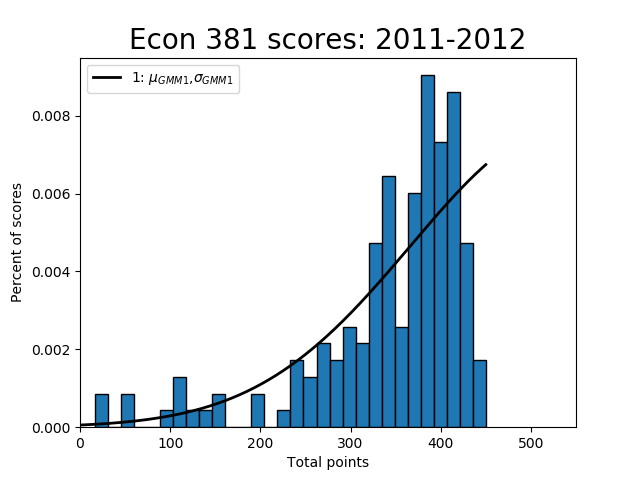

In [37]:
# Plot the histogram of the data
count, bins, ignored = plt.hist(pts, 30, edgecolor='black', normed=True)
plt.title('Econ 381 scores: 2011-2012', fontsize=20)
plt.xlabel('Total points')
plt.ylabel('Percent of scores')
plt.xlim([0, 550])  # This gives the xmin and xmax to be plotted"

# Plot the estimated GMM PDF
dist_pts = np.linspace(0, 450, 500)
plt.plot(dist_pts, trunc_norm_pdf(dist_pts, mu_GMM1, sig_GMM1, 450),
         linewidth=2, color='k', label='1: $\mu_{GMM1}$,$\sigma_{GMM1}$')
plt.legend(loc='upper left')

That looks just like the ML estimate from the previous notebook. Let's see what the criterion function looks like for different values of $\mu$ and $\sigma$.

<IPython.core.display.Javascript object>


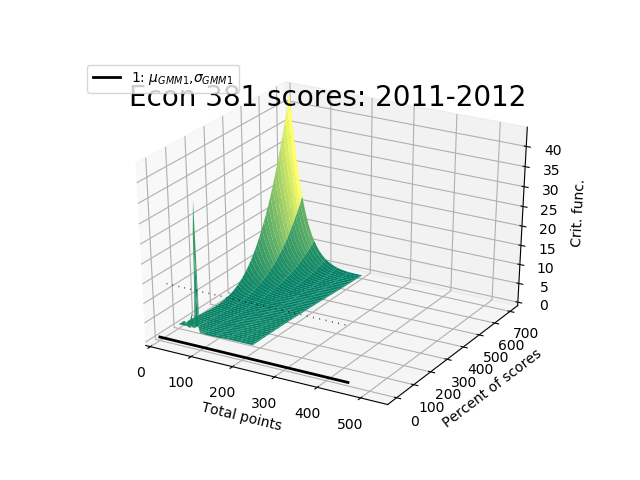

Text(0.5,0,'Crit. func.')

In [38]:
# Note that this will take a few minutes because the intgr.quad() commands
# are a little slow
mu_vals = np.linspace(60, 700, 50)
sig_vals = np.linspace(20, 200, 50)
# mu_vals = np.linspace(540, 572, 50)
# sig_vals = np.linspace(170, 182, 50)
crit_vals = np.zeros((50, 50))
for mu_ind in range(50):
    for sig_ind in range(50):
        crit_vals[mu_ind, sig_ind] = \
            criterion(np.array([mu_vals[mu_ind], sig_vals[sig_ind]]),
                      pts, 450.0, W_hat)

mu_mesh, sig_mesh = np.meshgrid(mu_vals, sig_vals)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(sig_mesh, mu_mesh, crit_vals, rstride=8,
                cstride=1, cmap=cmap1)
ax.set_title('Criterion function for values of mu and sigma')
ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'$\mu$')
ax.set_zlabel(r'Crit. func.')

Similar to the ML problem, it looks like the criterion function is roughly equal for a specific portion increase of $\mu$ and $\sigma$ together. That is, with these two moments probably have a correspondence of values of $\mu$ and $\sigma$ that give roughly the same criterion function value. This issue has two possible solutions.

1. Maybe we need the two-step variance covariance estimator to calculate a "more" optimal weighting matrix $W$.
2. Maybe our two moments aren't very good moments for fitting the data.

Let's first try the two-step weighting matrix.

In [39]:
err1 = err_vec(pts, mu_GMM1, sig_GMM1, 450.0, False)
VCV2 = np.dot(err1, err1.T) / pts.shape[0]
print(VCV2)
W_hat2 = lin.pinv(VCV2)  # Use the pseudo-inverse calculated by SVD because VCV2 is ill-conditioned
print(W_hat2)

[[  3.80435822e-10   2.70440398e-11]
 [  2.70440398e-11   1.92247956e-12]]
[[  2.60219810e+09   1.84982447e+08]
 [  1.84982447e+08   1.31498465e+07]]


In [40]:
# Note that this takes a little time because the intgr.quad() commands
# are a little slow
mu_init = 400
sig_init = 60
params_init = np.array([mu_GMM1, sig_GMM1])
# W_hat3 = np.array([[1. / VCV2[0, 0], 0.], [0., 1. / VCV2[1, 1]]])
gmm_args = (pts, 450.0, W_hat2)
results = opt.minimize(criterion, params_init, args=(gmm_args),
                       method='L-BFGS-B', bounds=((1e-10, None), (1e-10, None)))
mu_GMM2, sig_GMM2 = results.x
print('mu_GMM2=', mu_GMM2, ' sig_GMM2=', sig_GMM2)

mu_GMM2= 538.486721954  sig_GMM2= 171.188201558


Using a better weighting matrix didn't improve our estimates or fit very much. This means that we did not choose good moments for fitting the data. Let's try some different moments. How about four moments to match.

1. The percent of observations greater than 430 (between 430 and 450)
2. The percent of observations between 320 and 430
3. The percent of observations between 220 and 320
4. The percent of observations less than 220 (between 0 and 220)

In [41]:
def data_moments4(xvals):
    '''
    --------------------------------------------------------------------
    This function computes the four data moments for GMM
    (binpct_1, binpct_2, binpct_3, binpct_4).
    --------------------------------------------------------------------
    INPUTS:
    xvals = (N,) vector, test scores data

    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None

    OBJECTS CREATED WITHIN FUNCTION:
    bpct_1_dat = scalar in [0, 1], percent of observations
                 0 <= x < 220
    bpct_2_dat = scalar in [0, 1], percent of observations
                 220 <= x < 320
    bpct_3_dat = scalar in [0, 1], percent of observations
                 320 <= x < 430
    bpct_4_dat = scalar in [0, 1], percent of observations
                 430 <= x <= 450

    FILES CREATED BY THIS FUNCTION: None

    RETURNS: bpct_1, bpct_2, bpct_3, bpct_4
    --------------------------------------------------------------------
    '''
    bpct_1_dat = xvals[xvals < 220].shape[0] / xvals.shape[0]
    bpct_2_dat = (xvals[(xvals >=220) & (xvals < 320)].shape[0] /
                  xvals.shape[0])
    bpct_3_dat = (xvals[(xvals >=320) & (xvals < 430)].shape[0] /
                  xvals.shape[0])
    bpct_4_dat = xvals[xvals >= 430].shape[0] / xvals.shape[0]

    return bpct_1_dat, bpct_2_dat, bpct_3_dat, bpct_4_dat


def model_moments4(mu, sigma, cutoff):
    '''
    --------------------------------------------------------------------
    This function computes the four model moments for GMM
    (binpct_1, binpct_2, binpct_3, binpct_4).
    --------------------------------------------------------------------
    INPUTS:
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    cutoff = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        trunc_norm_pdf()
        xfx()
    
    OBJECTS CREATED WITHIN FUNCTION:
    bpct_1_mod = scalar in [0, 1], percent of model observations in
                 bin 1
    bp_1_err   = scalar > 0, estimated error in the computation of the
                 integral for bpct_1_mod
    bpct_2_mod = scalar in [0, 1], percent of model observations in
                 bin 2
    bp_2_err   = scalar > 0, estimated error in the computation of the
                 integral for bpct_2_mod
    bpct_3_mod = scalar in [0, 1], percent of model observations in
                 bin 3
    bp_3_err   = scalar > 0, estimated error in the computation of the
                 integral for bpct_3_mod
    bpct_4_mod = scalar in [0, 1], percent of model observations in
                 bin 4
    bp_4_err   = scalar > 0, estimated error in the computation of the
                 integral for bpct_4_mod
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: bpct_1_mod, bpct_2_mod, bpct_3_mod, bpct_4_mod
    --------------------------------------------------------------------
    '''
    xfx = lambda x: trunc_norm_pdf(x, mu, sigma, cutoff)
    (bpct_1_mod, bp_1_err) = intgr.quad(xfx, -np.inf, 220)
    (bpct_2_mod, bp_2_err) = intgr.quad(xfx, 220, 320)
    (bpct_3_mod, bp_3_err) = intgr.quad(xfx, 320, 430)
    (bpct_4_mod, bp_4_err) = intgr.quad(xfx, 430, 450)
    
    return bpct_1_mod, bpct_2_mod, bpct_3_mod, bpct_4_mod


def err_vec4(xvals, mu, sigma, cutoff, simple):
    '''
    --------------------------------------------------------------------
    This function computes the vector of moment errors (in percent
    deviation from the data moment vector) for GMM.
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, test scores data
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    cutoff = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
    simple = boolean, =True if errors are simple difference, =False if
             errors are percent deviation from data moments
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        data_moments4()
        model_moments4()
    
    OBJECTS CREATED WITHIN FUNCTION:
    mean_data  = scalar, mean value of data
    var_data   = scalar > 0, variance of data
    moms_data  = (2, 1) matrix, column vector of two data moments
    mean_model = scalar, mean value from model
    var_model  = scalar > 0, variance from model
    moms_model = (2, 1) matrix, column vector of two model moments
    err_vec    = (2, 1) matrix, column vector of two moment error
                 functions
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: err_vec
    --------------------------------------------------------------------
    '''
    bpct_1_dat, bpct_2_dat, bpct_3_dat, bpct_4_dat = \
        data_moments4(xvals)
    moms_data = np.array([[bpct_1_dat], [bpct_2_dat], [bpct_3_dat],
                          [bpct_4_dat]])
    bpct_1_mod, bpct_2_mod, bpct_3_mod, bpct_4_mod = \
        model_moments4(mu, sigma, cutoff)
    moms_model = np.array([[bpct_1_mod], [bpct_2_mod], [bpct_3_mod],
                          [bpct_4_mod]])
    if simple:
        err_vec = moms_model - moms_data
    else:
        err_vec = 100 * ((moms_model - moms_data) / moms_data)
    
    return err_vec


def criterion4(params, *args):
    '''
    --------------------------------------------------------------------
    This function computes the GMM weighted sum of squared moment errors
    criterion function value given parameter values and an estimate of
    the weighting matrix.
    --------------------------------------------------------------------
    INPUTS:
    params = (2,) vector, ([mu, sigma])
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    args   = length 3 tuple, (xvals, cutoff, W_hat)
    xvals  = (N,) vector, values of the truncated normally distributed
             random variable
    cutoff = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
    W_hat  = (R, R) matrix, estimate of optimal weighting matrix
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        err_vec4()
    
    OBJECTS CREATED WITHIN FUNCTION:
    err        = (4, 1) matrix, column vector of four moment error
                 functions
    crit_val   = scalar > 0, GMM criterion function value
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: crit_val
    --------------------------------------------------------------------
    '''
    mu, sigma = params
    xvals, cutoff, W = args
    err = err_vec4(xvals, mu, sigma, cutoff, simple=False)
    crit_val = np.dot(np.dot(err.T, W), err) 
    
    return crit_val

In [42]:
print(data_moments4(pts))
print(model_moments4(390, 80, 450))
params = np.array([390, 80])
print(criterion4(params, pts, 450.0, np.eye(4)))

(0.08695652173913043, 0.17391304347826086, 0.6894409937888198, 0.049689440993788817)
(0.021714393848308082, 0.22498050498387387, 0.6473927700563314, 0.1059130345791623)
[[ 19331.61491875]]


In [43]:
d = np.asarray(data_moments4(pts))
m = np.asarray(model_moments4(390, 80, 450))
e = (m-d)/d
crit = np.dot((np.dot(e, np.eye(4))), e)
crit*100**2

19331.614918745334

In [44]:
# Note that this takes a little time because the intgr.quad() commands
# are a little slow
mu_init = 400
sig_init = 70
params_init = np.array([mu_init, sig_init])
W_hat = np.eye(4)
# W_hat[1, 1] = 2.0
# W_hat[2, 2] = 2.0
gmm_args = (pts, 450.0, W_hat)
results_4 = opt.minimize(criterion4, params_init, args=(gmm_args),
                       method='L-BFGS-B', bounds=((1e-10, None), (1e-10, None)))
mu_GMM1_4, sig_GMM1_4 = results_4.x
print('mu_GMM1_4=', mu_GMM1_4, ' sig_GMM1_4=', sig_GMM1_4)

mu_GMM1_4= 361.661356738  sig_GMM1_4= 92.1344025862


In [45]:
print(data_moments4(pts))
print(model_moments4(mu_GMM1_4, sig_GMM1_4, 450))
params = np.array([mu_GMM1_4, sig_GMM1_4])
print(criterion4(params, pts, 450.0, np.eye(4)))

(0.08695652173913043, 0.17391304347826086, 0.6894409937888198, 0.049689440993788817)
(0.07469275719815748, 0.31702764105837716, 0.5357833969727903, 0.07254830120726588)
[[ 9583.7355866]]


In [46]:
# Plot the histogram of the data
count, bins, ignored = plt.hist(pts, 30, edgecolor='black', normed=True)
plt.title('Econ 381 scores: 2011-2012', fontsize=20)
plt.xlabel('Total points')
plt.ylabel('Percent of scores')
plt.xlim([0, 550])  # This gives the xmin and xmax to be plotted"

# Plot the estimated GMM PDF
dist_pts = np.linspace(0, 450, 500)
plt.plot(dist_pts, trunc_norm_pdf(dist_pts, mu_GMM1_4, sig_GMM1_4, 450),
         linewidth=2, color='k', label='1: $\mu_{GMM1}$,$\sigma_{GMM1}$')
plt.legend(loc='upper left')

Let's see how much things change if we use the two-step estimator for the optimal weighting matrix $W$ instead of the identity matrix.

In [47]:
err1_4 = err_vec4(pts, mu_GMM1_4, sig_GMM1_4, 450.0, False)
VCV2_4 = np.dot(err1_4, err1_4.T) / pts.shape[0]
print(VCV2_4)
W_hat2_4 = lin.pinv(VCV2_4)  # Use the pseudo-inverse calculated by SVD because VCV2 is ill-conditioned
print(W_hat2_4)

[[  1.23542792  -7.20854388   1.95232764  -4.02982539]
 [ -7.20854388  42.06081473 -11.39155041  23.51345042]
 [  1.95232764 -11.39155041   3.08523317  -6.36827074]
 [ -4.02982539  23.51345042  -6.36827074  13.14483218]]
[[ 0.00034866 -0.00203437  0.00055098 -0.00113728]
 [-0.00203437  0.01187025 -0.00321488  0.00663588]
 [ 0.00055098 -0.00321488  0.0008707  -0.00179723]
 [-0.00113728  0.00663588 -0.00179723  0.00370969]]


In [48]:
# Note that this takes a little time because the intgr.quad() commands
# are a little slow
mu_init = 350
sig_init = 98
params_init = np.array([mu_GMM1_4, sig_GMM1_4])
gmm_args = (pts, 450.0, W_hat2_4)
results2_4 = opt.minimize(criterion4, params_init, args=(gmm_args),
                       method='L-BFGS-B', bounds=((1e-10, None), (1e-10, None)))
mu_GMM2_4, sig_GMM2_4 = results2_4.x
print('mu_GMM2_4=', mu_GMM2_4, ' sig_GMM2_4=', sig_GMM2_4)
results2_4

mu_GMM2_4= 361.661345369  sig_GMM2_4= 92.1344224814


      fun: array([[ 161.]])
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([  1.42108547e-05,  -3.97903932e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 6
      nit: 1
   status: 0
  success: True
        x: array([ 361.66134537,   92.13442248])

No real change. The criterion function for different values of $\mu$ and $\sigma$ here has a clear minimum in a certain area. But it also has some really interesting nonlinearities.

<IPython.core.display.Javascript object>


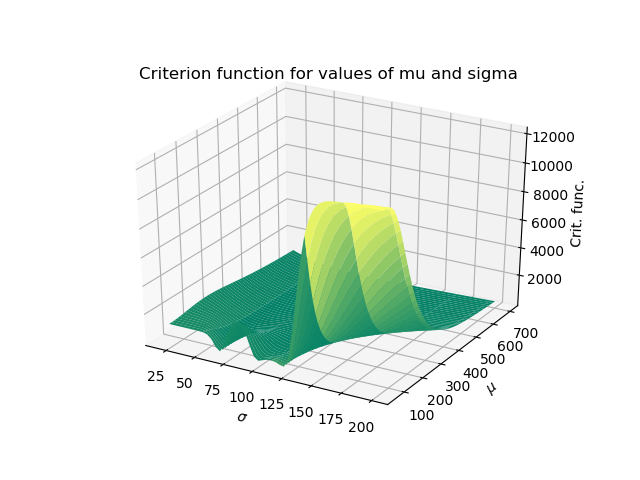

Text(0.5,0,'Crit. func.')

In [49]:
# Note that this will take a few minutes because the intgr.quad() commands
# are a little slow
mu_vals = np.linspace(60, 700, 50)
sig_vals = np.linspace(20, 200, 50)
# mu_vals = np.linspace(350, 370, 50)
# sig_vals = np.linspace(85, 98, 50)
crit_vals4 = np.zeros((50, 50))
for mu_ind in range(50):
    for sig_ind in range(50):
        crit_vals4[mu_ind, sig_ind] = \
            criterion4(np.array([mu_vals[mu_ind], sig_vals[sig_ind]]),
                      pts, 450.0, W_hat2_4)

mu_mesh, sig_mesh = np.meshgrid(mu_vals, sig_vals)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(sig_mesh, mu_mesh, crit_vals4, rstride=8,
                cstride=1, cmap=cmap1)
ax.set_title('Criterion function for values of mu and sigma')
ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'$\mu$')
ax.set_zlabel(r'Crit. func.')

### 4.2. Unconditional and conditional expectations, instruments, and moments
Most standard treatments of the generalized method of moments estimator in econometrics textbooks start with this principle and this selection of moments. However, this notebook follows the progression of starting with the most general treatment of GMM and then covering these special cases.

In stochastic models, the assumed data generating process might have one or more characterizing equations that involve an unconditional expectation. The unconditional expectation is a strong assumption with many implications on conditional expectations that can create moments for identifying parameters using GMM. In econometric models, these unconditional expectations often show up as an assumption on the error term of one or more of the equations. Note that this is a minimal assumption and does not require knowledge of the distribution of the error term.

$$ y_i = \beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i} + \varepsilon_i \quad\text{where}\quad E\left[\varepsilon_i\right] = 0 $$

In a macroeconomic model like the Brock and Mirman (1972) model, unconditional expectations show up in two places. The first is in the Euler equation, which is the first equation below. And the second is on the error term in the law of motion for the productivity shock, which is the last equation below.

$$ \quad\left(c_t\right)^{-1} = \beta E\left[r_{t+1}\left(c_{t+1}\right)^{-1}\right] $$
$$ c_t + k_{t+1} = r_{t+1}k_t + w_t $$
$$ \quad w_t = (1 - \alpha)e^{z_t}k_{t}^\alpha $$
$$ r_t = \alpha e^{z_t}k_{t}^{\alpha-1} $$
$$ \qquad\qquad\qquad\qquad\qquad\qquad z_{t} = \rho z_{t-1} + (1 - \rho)\mu + \varepsilon_t \quad\text{where}\quad E[\varepsilon_t]=0 $$

It is valuable to note first that these unconditional expectations imply minimal restrictions on the stochastic distributions in the model. They only imply a restriction on the first moments of those particular parts of the distributions. Furthermore, because they are unconditional distributions (which is a strong assumption), they also imply restrictions on conditional distributions.

Let $\mathcal{I}$ be the set of variables that are in the information set of the model at the time the expectations operator in the model is formed. Let $w\in\mathcal{I}$ be the typical element (variable) in the information set. In a cross sectional econometric model, the variables in the information set are $w\in\mathcal{I}$ that could possibly be related to the dependent variable $y$ and were determined at the time the expectation was formed. In dynamic models or time series models, variables in the information set include any variables that were determined on or before the period in which the expectation was formed.

The following sequence shows how an unconditional expectation can lead to moments that can identify parameters.

$$ E[x] = 0 \Rightarrow E[x|\mathcal{I}] = 0 \Rightarrow Cov[x,w] = 0 \Rightarrow E[xw] = 0 $$

The first equation states that the unconditional expectation of $x$ is zero. This implies that the conditional expectation of $x$ given anything else in the information set is also zero. This, in turn, implies that the covariance of $x$ and any element $w$ of the information set is zero so that the expectation of $x$ times $w$ is zero. It is this last equation that generates many of the moments used to identify parameters in GMM. Any variable in the instrument set $w\in\mathcal{I}$ can generate a moment condition.

#### 4.2.1. Econometric (linear regression) GMM example using unconditional expectation for moments
In the econometric model example above, there are three parameters to be estimated $(\beta_0, \beta_1, \beta_2)$. We need at least three independent moments to identify these parameters. The first moment we can use is the assumption that the unconditional expectation of the error terms is zero. This has an empirical counterpart that the sample mean of the error terms should be zero.

$$ \text{(Theoretical moment 1)}\quad E[\varepsilon_i] = 0 \quad\Rightarrow\quad E\left[y_i - \beta_0 - \beta_1 x_{1,i} - \beta_2 x_{2,i}\right]=0 $$
$$ \text{(Empirical moment 1)}\qquad\qquad\qquad\:\:\: \frac{1}{N}\sum_{i=1}^N\left[y_i - \beta_0 - \beta_1 x_{1,i} - \beta_2 x_{2,i}\right]=0 $$

The next two moments are formed from the implications that the unconditional expectation on the errors implies that the expected value of the product of the error and any other variable in the information set is also zero.

$$ \text{(Theoretical moment 2)}\quad E[\varepsilon_i x_{1,i}] = 0 \quad\Rightarrow\quad E\Bigl[\left(y_i - \beta_0 - \beta_1 x_{1,i} - \beta_2 x_{2,i}\right)x_{1,i}\Bigr]=0 $$
$$ \text{(Empirical moment 2)}\qquad\qquad\qquad\qquad \frac{1}{N}\sum_{i=1}^N\Bigl[\left(y_i - \beta_0 - \beta_1 x_{1,i} - \beta_2 x_{2,i}\right)x_{1,i}\Bigr]=0 $$

$$ \text{(Theoretical moment 3)}\quad E[\varepsilon_i x_{2,i}] = 0 \quad\Rightarrow\quad E\Bigl[\left(y_i - \beta_0 - \beta_1 x_{1,i} - \beta_2 x_{2,i}\right)x_{2,i}\Bigr]=0 $$
$$ \text{(Empirical moment 3)}\qquad\qquad\qquad\qquad \frac{1}{N}\sum_{i=1}^N\Bigl[\left(y_i - \beta_0 - \beta_1 x_{1,i} - \beta_2 x_{2,i}\right)x_{2,i}\Bigr]=0 $$

#### 4.2.2. Brock and Mirman (1972) estimation by GMM using unconditional expectations for moments
Give Brock and Mirman (1972) example.

Cite Hansen and Singleton (1982) example.

## 5. Identification
An issue that we saw in the examples from the previous section is that there is some science as well as some art in choosing moments to identify the parameters in a GMM estimation. Suppose the parameter vector $\theta$ has $K$ elements, or rather, $K$ parameters to be estimated. In order to estimate $\theta$ by GMM, you must have at least as many moments as parameters to estimate $R\geq K$. If you have exactly as many moments as parameters to be estimated $R=K$, the model is said to be *exactly identified*. If you have more moments than parameters to be estimated $R>K$, the model is said to be *overidentified*. If you have fewer moments than parameters to be estimated $R<K$, the model is said to be *underidentified*. There are good reasons to overidentify $R>K$ the model in GMM estimation as we saw in the previous example. The main reason is that not all moments are orthogonal. That is, some moments convey roughly the same information about the data and, therefore, do not separately identify any extra parameters. So a good GMM model often is overidentified $R>K$.

One last point about GMM regards moment selection and verification of results. The real world has an infinite supply of potential moments that describe some part of the data. Choosing moments to estimate parameters by GMM requires understanding of the model, intuition about its connections to the real world, and artistry. A good GMM estimation will include moments that have some relation to or story about their connection to particular parameters of the model to be estimated. In addition, a good verification of a GMM estimation is to take some moment from the data that was not used in the estimation and see how well the corresponding moment from the estimated model matches that *outside moment*.

## 6. Linear regression by GMM and relation to OLS
The most common method of estimating the parameters of a linear regression is using the ordinary least squares (OLS) estimator. This estimator is just special type of generalized method of moments (GMM) estimator. A simple regression specification in which the dependent variable $y_i$ is a linear function of two independent variables $x_{1,i}$ and $x_{2,i}$ is the following:

$$ y_i = \beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i} + \varepsilon_i \quad\text{where}\quad \varepsilon_i\sim N\left(0,\sigma^2\right) $$

Note that we can solve for the parameters $(\beta_0,\beta_1,\beta_2)$ in a number of ways. And we can do it without making any assumptions about the distribution of the error terms $\varepsilon_i$.

One way we might choose the parameters is to choose $(\beta_0,\beta_1,\beta_2)$ to minimize the distance between the $N$ observations of $y_i$ and the $N$ predicted values for $y_i$ given by $\beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i}$. You can think of the $N$ observations of $y_i$ as $N$ data moments. And you can think of the $N$ observations of $\beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i}$ as $N$ model moments. The least squares estimator minimizes the sum of squared errors, which is the sum of squared deviations between the $N$ values of $y_i$ and  $\beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i}$.

$$ \varepsilon_i = y_i - \beta_0 - \beta_1 x_{1,i} - \beta_2 x_{2,i} $$

$$ \hat{\theta}_{OLS} = \theta:\quad \min_{\theta} \varepsilon^T\, I \, \varepsilon $$

Let the $N\times 1$ vector of $y_i$'s be $Y$. Let the $N\times 3$ vector of data $(1, x_{1,i}, x_{2,i})$ be $X$. And let the vector of three parameters $(\beta_0, \beta_1, \beta_2)$ be $\beta$. It can be shown that the OLS estimator for the vector of parameters $\beta$ is the following.

$$ \hat{\beta}_{OLS} = (X^T X)^{-1}(X^T Y) $$

But you could also just estimate the coefficients using the criterion function in the GMM statement of the problem above. This method is called nonlinear least squares or generalized least squares. Many applications of regression use a weighting matrix in the criterion function that adjusts for issues like heteroskedasticity and autocorrelation. 

Lastly, many applications use a different distance metric than the weighted sum of squared errors for the difference in moments. Sum of squared errors puts a large penalty on big differences. Sometimes you might want to maximize the sum of absolute errors, which is sometimes called median regression. You could also minimize the maximum absolute difference in the errors, which is even more extreme than the sum of squared errors on penalizing large differences.

## 7. References
* Adda, Jerome and Russell Cooper, *Dynamic Economics: Quantitative Methods and Applications*, MIT Press (2003).
* Brock, William A. and Leonard J. Mirman, "Optimal Economic Growth and Uncertainty: The Discounted Case," *Journal of Economic Theory*, 4:3, pp. 479-513 (June 1972).
* Davidson, Russell and James G. MacKinnon, *Econometric Theory and Methods*, Oxford University Press (2004).
* Fuhrer, Jeffrey C., George R. Moore, and Scott D. Schuh, "Estimating the Linear-quadratic Inventory Model: Maximum Likelihood versus Generalized Method of Moments," *Journal of Monetary Economics*, 35:1, pp. 115-157 (February 1995).
* Hansen, Lars Peter, "Large Sample Properties of Generalized Method of Moments Estimators," *Econometrica*, 50:4, pp. 1029-1054 (July 1982).
* Hansen, Lars Peter and Kenneth J. Singleton, "Generalized Instrumental Variables Estimation of Nonlinear Rational Expectations Models", *Econometrica*, 50:5, pp. 1269-1286 (September 1982).
* Newey, Whitney K. and Kenneth D. West, "A Simple, Positive, Semi-definite, Heteroskedasticy and Autocorrelation Consistent Covariance Matrix," *Econometrica*, 55:3, pp. 703-708 (May 1987).